In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
os.getcwd()

In [157]:
X_train = pd.read_csv('../data/processed/X2_train.csv', index_col=0)
X_test = pd.read_csv('../data/processed/X2_test.csv', index_col=0)
y_train = pd.read_csv('../data/processed/y2_train.csv', index_col=0)
y_test = pd.read_csv('../data/processed/y2_test.csv', index_col=0)

In [158]:
X_train.head()

,signs_of_mental_illness,body_camera,gender_F,gender_M,gender_Nonbinary,threat_level_attack,threat_level_not_attack,threat_level_unspecified,flee_Car,flee_Foot,...,armed_knife,armed_machete,armed_other,armed_sword,armed_toy weapon,armed_unarmed,armed_undetermined,armed_unknown weapon,armed_vehicle,standardized_age
1068,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.585288
4093,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.128062
2586,1,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0.125779
4284,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.049055
3839,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.111243


TRYING DUMMY CLASSIFIER

Because my data is imbalanced

In [159]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_confusion_matrix, f1_score, recall_score
from sklearn.model_selection import cross_val_score


dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train, y_train)


DummyClassifier(random_state=42, strategy='most_frequent')

Accuracy: 0.546191247974068
[[674   0]
 [560   0]]
ROC_AUC: 0.5


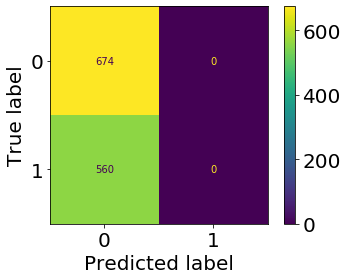

In [160]:
y_predict_dummy = dummy.predict(X_test)
print('Accuracy:', dummy.score(X_test, y_test))
print(confusion_matrix(y_test, y_predict_dummy))
plot_confusion_matrix(dummy, X_test, y_test)
predprob = dummy.predict_proba(X_test)[:,1]
print('ROC_AUC:', roc_auc_score(y_test, predprob))
f1_dum = f1_score(y_test, y_predict_dummy)
recall_dum = recall_score(y_test, y_predict_dummy)
auc_dum = roc_auc_score(y_test, dummy.predict_proba(X_test)[:,1])

In [161]:
cv_scores_test= cross_val_score(dummy,X_test,y_test,cv=5,scoring='f1')
cv_scores_train= cross_val_score(dummy,X_train,y_train,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_dum_test= cv_scores_test.mean()
cv_scores_dum_train= cv_scores_train.mean()
cv_scores_std_dum= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_dum_test))
print ('Mean cross validation train score: ' +str(cv_scores_dum_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_dum))

[0. 0. 0. 0. 0.]
Mean cross validation test score: 0.0
Mean cross validation train score: 0.0
Standard deviation in cv scores: 0.0


Since, I'm interested mostly in how many 'True' were predicted 'True,' the F1 Score seems especially useful for me. I may also want to look at 'Recall' to judge a model by its false negatives.

SUPERVISED LEARNING

SVM 

[[485 189]
 [224 336]]
0.6653160453808752
0.6193548387096774


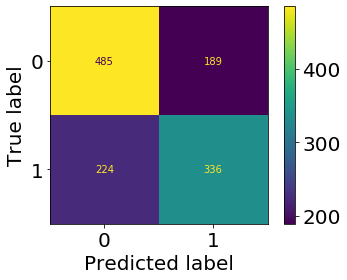

In [162]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

# Predict using model:

y_predict_svm=svm.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_svm)
Accuracy_svm=svm.score(X_test,y_test)
f1_svm = f1_score(y_test, y_predict_svm)
recall_svm = recall_score(y_test, y_predict_svm)
auc_svm = roc_auc_score(y_test, svm.predict_proba(X_test)[:,1])

print(cnf_matrix)
print(Accuracy_svm)
print(f1_score(y_test, y_predict_svm))
plot_confusion_matrix(svm, X_test, y_test)

In [163]:
cv_scores_test= cross_val_score(svm,X_test,y_test,cv=5,scoring='f1')
cv_scores_train= cross_val_score(svm,X_train,y_train,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_svm_test= cv_scores_test.mean()
cv_scores_svm_train= cv_scores_train.mean()
cv_scores_std_svm= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_svm_test))
print ('Mean cross validation train score: ' +str(cv_scores_svm_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_svm))

[0.54935622 0.57407407 0.62068966 0.58064516 0.61818182]
Mean cross validation test score: 0.5885893863789188
Mean cross validation train score: 0.6318913648874236
Standard deviation in cv scores: 0.027273376670661428


The SVM does ok compared to this, given ROC_AUC. 0.5 compared to 0.67.

RANDOM FOREST

Accuracy: 0.6450567260940032
ROC_AUC: 0.6961146142433234
F1 Score: 0.5804597701149425
Recall Score: 0.5410714285714285


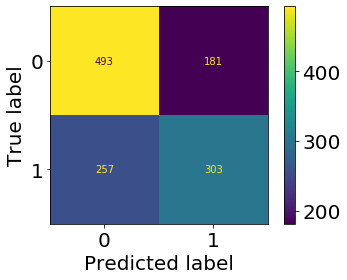

In [164]:
from sklearn.ensemble import RandomForestClassifier

#Apply RF to the training data:

rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='gini')
rf.fit(X_train, y_train)

#Predict using the model:

y_predict_rf = rf.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_rf)
plot_confusion_matrix(rf, X_test, y_test)
predprob = rf.predict_proba(X_test)[:,1]
Accuracy_rf=rf.score(X_test,y_test)
f1_rf = f1_score(y_test, y_predict_rf)
recall_rf = recall_score(y_test, y_predict_rf)
auc_rf = roc_auc_score(y_test, predprob)

print('Accuracy:', Accuracy_rf)
print('ROC_AUC:', roc_auc_score(y_test, predprob))
print('F1 Score:', f1_score(y_test, y_predict_rf))
print('Recall Score:', recall_score(y_test, y_predict_rf))


In [165]:
cv_scores_test= cross_val_score(rf,X_test,y_test,cv=5,scoring='f1')
cv_scores_train= cross_val_score(rf,X_train,y_train,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_rf))

[0.5625     0.59223301 0.58767773 0.55       0.57843137]
Mean cross validation test score: 0.5741684214752482
Mean cross validation train score: 0.5881037068439277
Standard deviation in cv scores: 0.015794100424888415


GRADIENT BOOST

Accuracy: 0.653160453808752
F1 Score: 0.5946969696969697
ROC-AUC: 0.7031952098346756
Recall Score: 0.5607142857142857


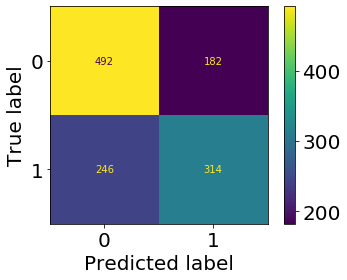

In [166]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
gbc = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05 , n_estimators=160, random_state=5, max_depth=9, max_leaf_nodes=100)
gbc.fit(X_train, y_train)

#Predict using the model:

y_predict_gbc = gbc.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_gbc)
plot_confusion_matrix(gbc, X_test, y_test)
predprob = gbc.predict_proba(X_test)[:,1]
Accuracy_gbc=gbc.score(X_test,y_test)
f1_gbc = f1_score(y_test, y_predict_gbc)
recall_gbc = recall_score(y_test, y_predict_gbc)
auc_gbc = roc_auc_score(y_test, predprob)

print('Accuracy:', Accuracy_gbc)
print('F1 Score:', f1_score(y_test, y_predict_gbc))
print('ROC-AUC:', roc_auc_score(y_test, gbc.predict_proba(X_test)[:,1]))
print('Recall Score:', recall_score(y_test, y_predict_gbc))


In [167]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(gbc,X_test,y_test,cv=5,scoring='f1')
cv_scores_train= cross_val_score(gbc,X_train,y_train,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_gbc_test= cv_scores_test.mean()
cv_scores_gbc_train= cv_scores_train.mean()
cv_scores_std_gbc= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_gbc_test))
print ('Mean cross validation train score: ' +str(cv_scores_gbc_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_gbc))

[0.57383966 0.55660377 0.60829493 0.54901961 0.57918552]
Mean cross validation test score: 0.5733886990225735
Mean cross validation train score: 0.6038522546681367
Standard deviation in cv scores: 0.020629289152497895


LOGISTIC REGRESSION

Accuracy: 0.6766612641815235
F1 Score: 0.6288372093023256
ROC-AUC: 0.7150540483255616
Recall Score: 0.6035714285714285


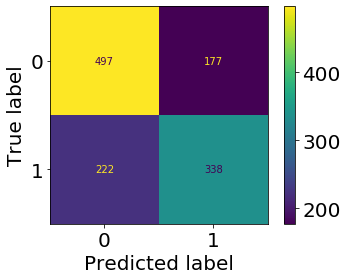

In [168]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_predict_lr = lr.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_predict_lr)
plot_confusion_matrix(lr, X_test, y_test)

predprob = lr.predict_proba(X_test)[:,1]
Accuracy_lr=lr.score(X_test,y_test)
f1_lr = f1_score(y_test, y_predict_lr)
recall_lr = recall_score(y_test, y_predict_lr)
auc_lr = roc_auc_score(y_test, predprob)

print('Accuracy:', Accuracy_lr)
print('F1 Score:', f1_score(y_test, y_predict_lr))
print('ROC-AUC:', roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))
print('Recall Score:', recall_score(y_test, y_predict_lr))


In [169]:
cv_scores_test= cross_val_score(lr,X_test,y_test,cv=5,scoring='f1')
cv_scores_train= cross_val_score(lr,X_train,y_train,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_lr= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_lr))

[0.52586207 0.58215962 0.63551402 0.5915493  0.58333333]
Mean cross validation test score: 0.5836836682356464
Mean cross validation train score: 0.6332412741334202
Standard deviation in cv scores: 0.03491141965386168


In [170]:
models = ['dummy', 'svm', 'rf', 'gbc', 'lr']
auc = [auc_dum, auc_svm, auc_rf, auc_gbc, auc_lr]
recall = [recall_dum, recall_svm, recall_rf, recall_gbc, recall_lr]
cv_f1_train = [cv_scores_dum_train, cv_scores_svm_train, cv_scores_rf_train, cv_scores_gbc_train, cv_scores_lr_train]
cv_f1_test = [cv_scores_dum_test, cv_scores_svm_test, cv_scores_rf_test, cv_scores_gbc_test, cv_scores_lr_test]

df = pd.DataFrame(list(zip(models, auc, recall, cv_f1_train, cv_f1_test)),
                 columns = ['Model', 'AUC Score', 'Recall Score', 'CV F1 Scores: Train', 'CV F1 Scores: Test'])
df

,Model,AUC Score,Recall Score,CV F1 Scores: Train,CV F1 Scores: Test
0,dummy,0.500000,0.000000,0.000000,0.000000
1,svm,0.710041,0.600000,0.631891,0.588589
2,rf,0.696115,0.541071,0.588104,0.574168
3,gbc,0.703195,0.560714,0.603852,0.573389
4,lr,0.715054,0.603571,0.633241,0.583684


The highest performing models were SVM and Logistic Regression.

HYPERPARAMETER TUNING

Logistic Regression

In [171]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['none', 'l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='f1')
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.636840 using {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}
0.636840 (0.010379) with: {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}
0.636222 (0.009416) with: {'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}
nan (nan) with: {'C': 100, 'penalty': 'none', 'solver': 'liblinear'}
0.636609 (0.010491) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.636188 (0.010170) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.636609 (0.010491) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.636840 (0.010379) with: {'C': 10, 'penalty': 'none', 'solver': 'newton-cg'}
0.636222 (0.009416) with: {'C': 10, 'penalty': 'none', 'solver': 'lbfgs'}
nan (nan) with: {'C': 10, 'penalty': 'none', 'solver': 'liblinear'}
0.634491 (0.010269) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.635304 (0.010466) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.634491 (0.010269) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.636840 (0.010379) with: {'C': 

0.6246524559777572


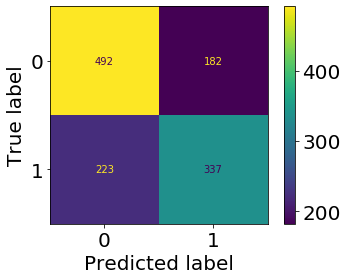

In [172]:
lr = LogisticRegression(C=100, penalty='none', solver='lbfgs')
lr.fit(X_train, y_train)
y_predict_lr_tune = lr.predict(X_test)
print(f1_score(y_test, y_predict_lr_tune))
plot_confusion_matrix(lr, X_test, y_test)


USING SMOTE TO CREATE MORE SAMPLES OF MY LESS REPRESENTED CLASS

0.6255749770009199


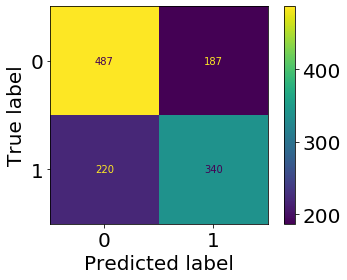

In [173]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.values)

#Best: 0.634350 using {'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}

clf = LogisticRegression(C=100, penalty='none', solver='lbfgs')
model_res = clf.fit(X_train_res, y_train_res)
y_predict_lr_res =  model_res.predict(X_test)
print(f1_score(y_test, y_predict_lr_res))
plot_confusion_matrix(model_res, X_test, y_test)

The score decreased.

# Why is the above code consistently giving me 0.64 test score, but the below Cross_val is 0.58. 
# Why do cross_val again?
# Becaue I'm 'overfitting' on my test_data? So cross val tries with different test_data?

In [174]:
cv_scores_train= cross_val_score(lr,X_train,y_train,cv=5,scoring='f1')
cv_scores_test= cross_val_score(lr,X_test,y_test,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_lr= cv_scores_test.std()
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_lr))

[0.52320675 0.5754717  0.61818182 0.58490566 0.61883408]
Mean cross validation train score: 0.6362222626558613
Mean cross validation test score: 0.5841200016889452
Standard deviation in cv scores: 0.035074518222546494


Little Aside, to Visualize Which Race the Predicted Black/Hispanic Fatalities Actually Belong To

In [175]:
idx = X_test[y_predict_lr == 1].index
df = pd.read_csv('../data/processed/fatalwrangling.csv', index_col=0)
df.loc[idx].race.value_counts()

B    194
W    164
H    144
A      9
O      3
N      1
Name: race, dtype: int64

Plotting Feature Importance - Logistic Regression

In [176]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.figure(figsize=(20,20))
    plt.rc('ytick', labelsize=20) 
    plt.rc('xtick', labelsize=20)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.rc('axes', titlesize=20)     # fontsize of the axes title
    plt.rc('axes', labelsize=20)   # fontsize of the x and y labels
    plt.title('Feature Importances for Tuned Logistic Regression Model')
    plt.xlabel('Size of Coefficient')
    plt.ylabel('Name of Feature')
    plt.show()

In [177]:
#index of top features
print(lr.coef_.argsort()[:, -30:])
#names of top features, ascending
print(X_test.columns[lr.coef_.argsort()[:, -30:]])
#coefficients of top festures, ascending
print(np.sort(lr.coef_)[:, -30:])

[[19 16 36 38 54 49 29  1 41 22 92 17  3 47 59 24 52 20 23 57 33 18 45 28
  32 48 46 34 21 53]]
[['state_CO' 'state_AR' 'state_MI' 'state_MO' 'state_SC' 'state_OH'
  'state_IN' 'body_camera' 'state_NC' 'state_DE' 'armed_machete'
  'state_AZ' 'gender_M' 'state_NV' 'state_VA' 'state_GA' 'state_PA'
  'state_CT' 'state_FL' 'state_TX' 'state_MA' 'state_CA' 'state_NJ'
  'state_IL' 'state_LA' 'state_NY' 'state_NM' 'state_MD' 'state_DC'
  'state_RI']]
[[0.27153557 0.28621464 0.30832366 0.36593508 0.41648576 0.46310129
  0.52458668 0.53130522 0.53266678 0.6681809  0.7502787  0.77639488
  0.96984553 0.98465134 0.98892566 0.98910828 1.01232249 1.04128184
  1.17652081 1.29468593 1.3556271  1.46740523 1.52730071 1.58335564
  1.65495607 1.71087547 1.77708997 1.94127071 3.38323529 5.98903682]]


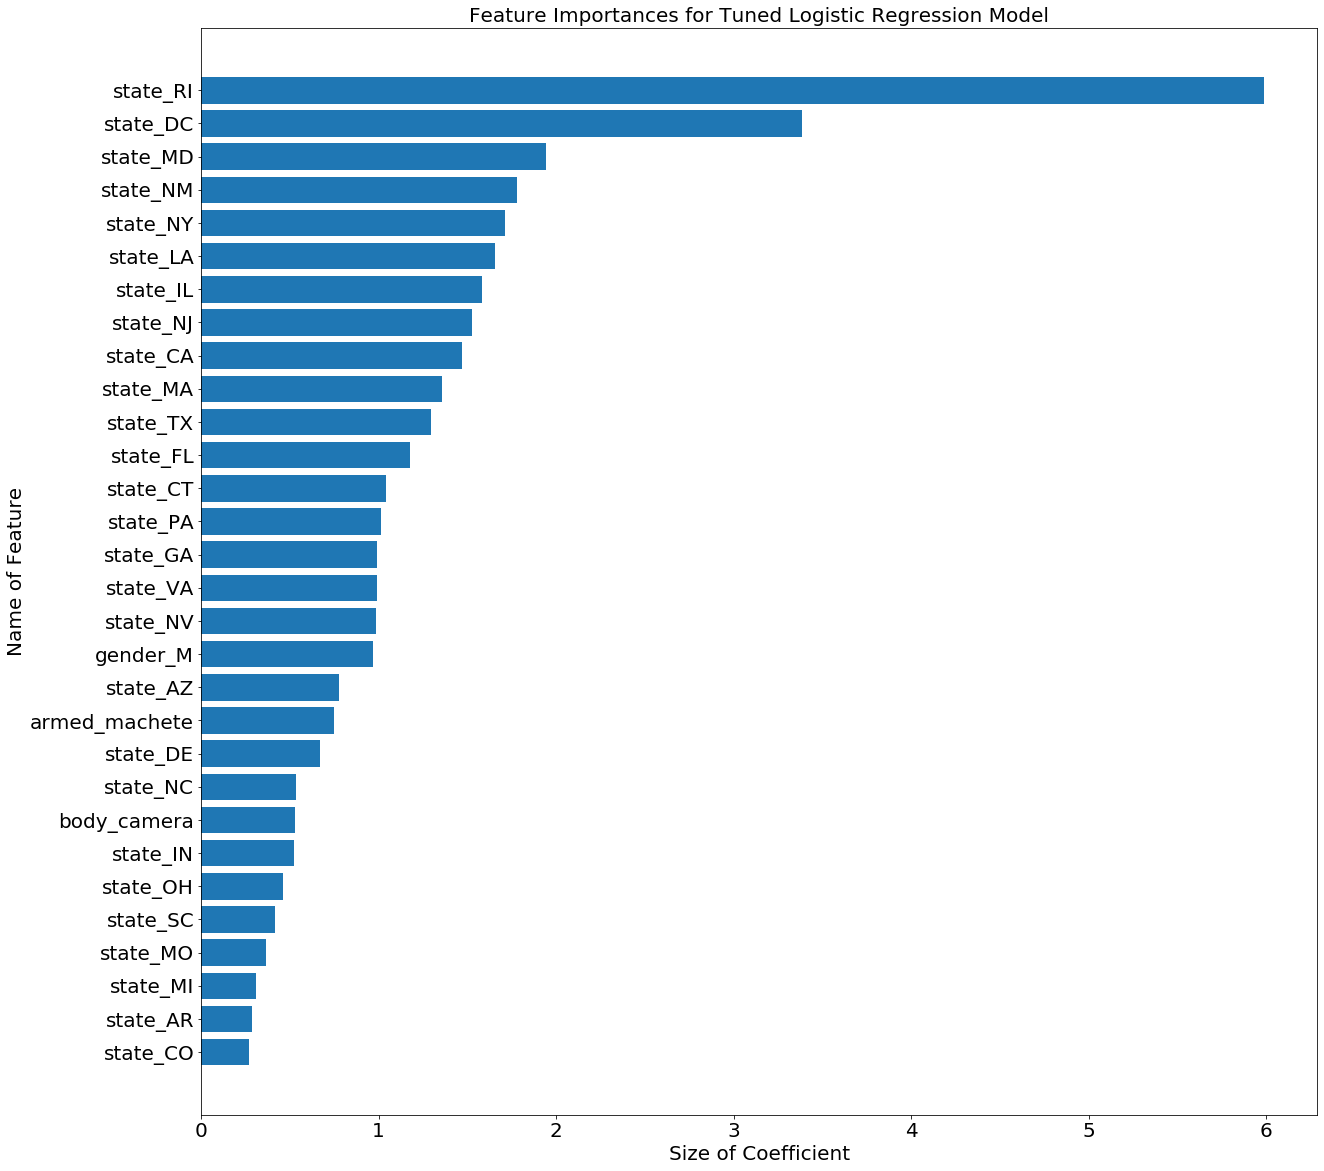

In [178]:
feature_names = X_test.columns[lr.coef_.argsort()[0, -30:]]
importances = np.sort(lr.coef_)[0, -30:]
f_importances(importances, feature_names)

SVM, Hyperparameter Tuning

In [179]:
#took 35 min
cw = ['balanced', None]

# svm.coef_ attribute is only availabel on linear kernels, so...
kernel = ['linear']

C = [0.01, .1, 1, 10, 100, 1000]
gamma = ['scale','auto']
grid = dict(class_weight=cw, kernel=kernel, C=C, gamma=gamma)

model = SVC()

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           cv=5, scoring='f1', error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# Why does my source that I'm following use cv = RepeatedStratifiedKFold(....) instead of cv=5? Is this an outdated thing, I think it automatically used Kfold or RepeatedStratifiedKFold with the cv arg.
https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

In [180]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.657177 using {'C': 100, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
0.635972 (0.007029) with: {'C': 0.01, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
0.635972 (0.007029) with: {'C': 0.01, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'linear'}
0.592417 (0.021821) with: {'C': 0.01, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}
0.592417 (0.021821) with: {'C': 0.01, 'class_weight': None, 'gamma': 'auto', 'kernel': 'linear'}
0.654776 (0.008018) with: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
0.654776 (0.008018) with: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'linear'}
0.628248 (0.015179) with: {'C': 0.1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}
0.628248 (0.015179) with: {'C': 0.1, 'class_weight': None, 'gamma': 'auto', 'kernel': 'linear'}
0.655125 (0.009571) with: {'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
0

In [181]:
#Took 5min
#Best: 0.657177 using {'C': 100, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
svc= SVC(C=100, class_weight='balanced', gamma='scale', kernel='linear')

cv_scores_train= cross_val_score(svc,X_train,y_train,cv=5,scoring='f1')
cv_scores_test= cross_val_score(svc,X_test,y_test,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_lr= cv_scores_test.std()
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_lr))

[0.5483871  0.58474576 0.66666667 0.6        0.63636364]
Mean cross validation train score: 0.657177254484677
Mean cross validation test score: 0.6072326325032722
Standard deviation in cv scores: 0.04099216306572147


In [182]:
#took 3min
#same but with X_train_res, y_train_res

svc= SVC(C=100, class_weight='balanced', gamma='scale', kernel='linear')

cv_scores_train= cross_val_score(svc,X_train_res,y_train_res,cv=5,scoring='f1')
cv_scores_test= cross_val_score(svc,X_test,y_test,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_lr= cv_scores_test.std()
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_lr))

[0.5483871  0.58474576 0.66666667 0.6        0.63636364]
Mean cross validation train score: 0.6457748659229965
Mean cross validation test score: 0.6072326325032722
Standard deviation in cv scores: 0.04099216306572147


In [183]:
#took 3 min
svc= SVC(C=100, class_weight='balanced', gamma='scale', kernel='linear', probability=True)
#fit training set
svc.fit(X_train, y_train)
y_predict_svc = svc.predict(X_test)
#scores svc
predprob = svc.predict_proba(X_test)[:,1]
Accuracy_svc=svc.score(X_test,y_test)
f1_svc = f1_score(y_test, y_predict_svc)
recall_svc = recall_score(y_test, y_predict_svc)
auc_svc = roc_auc_score(y_test, predprob)

#fit resampled data
svc.fit(X_train_res, y_train_res)
y_predict_svc_res = svc.predict(X_test)

#scores svc_resampled
predprob = svc.predict_proba(X_test)[:,1]
Accuracy_svc_res=svc.score(X_test,y_test)
f1_svc_res = f1_score(y_test, y_predict_svc_res)
recall_svc_res = recall_score(y_test, y_predict_svc_res)
auc_svc_res = roc_auc_score(y_test, predprob)



models = ['fit_on_training_data', 'fit_on_resampled_training_data']
auc = [auc_svc, auc_svc_res]
recall = [recall_svc, recall_svc_res]
f1s = [f1_svc, f1_svc_res]

df = pd.DataFrame(list(zip(models, auc, recall, f1s)),
                 columns = ['Model', 'AUC Score', 'Recall Score', 'F1 Score'])
df

,Model,AUC Score,Recall Score,F1 Score
0,fit_on_training_data,0.710686,0.664286,0.638079
1,fit_on_resampled_training_data,0.710871,0.610714,0.622384


In [184]:
#took 
#Cross Validated F1 Score on Test Data
svc.fit(X_train, y_train)
cv = cross_val_score(svc, X_test, y_test,scoring='f1').mean()
print('Cross Validated F1 Score on Test Data:', cv)

Cross Validated F1 Score on Test Data: 0.6072326325032722


In [185]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.figure(figsize=(20,20))
    plt.rc('ytick', labelsize=20) 
    plt.rc('xtick', labelsize=20)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.rc('axes', titlesize=20)     # fontsize of the axes title
    plt.rc('axes', labelsize=20)   # fontsize of the x and y labels
    plt.title('Feature Importances for Tuned SVC Model')
    plt.xlabel('Size of Coefficient')
    plt.ylabel('Name of Feature')
    plt.show()

In [186]:
#index of top features
print(svc.coef_.argsort()[:, -30:])
#names of top features, ascending
print(X_test.columns[svc.coef_.argsort()[:, -30:]])
#coefficients of top festures, ascending
print(np.sort(svc.coef_)[:, -30:])

[[91 85 72 96 88 99 29 41  1 20 17  3 92 24 22 59 47 52 23 28 57 33 45 18
  48 32 34 46 21 53]]
[['armed_knife' 'day_of_week_Thursday' 'month_February' 'armed_unarmed'
  'armed_Taser' 'armed_vehicle' 'state_IN' 'state_NC' 'body_camera'
  'state_CT' 'state_AZ' 'gender_M' 'armed_machete' 'state_GA' 'state_DE'
  'state_VA' 'state_NV' 'state_PA' 'state_FL' 'state_IL' 'state_TX'
  'state_MA' 'state_NJ' 'state_CA' 'state_NY' 'state_LA' 'state_MD'
  'state_NM' 'state_DC' 'state_RI']]
[[0.15175376 0.16828518 0.16975257 0.1779623  0.19815802 0.20746169
  0.24163512 0.29368842 0.45652337 0.55743277 0.5683124  0.63239316
  0.67069347 0.7068782  0.70775771 0.74652731 0.76980967 0.84503461
  0.90406591 1.02312841 1.0591682  1.09092585 1.1659713  1.17904228
  1.22607298 1.26618034 1.35104454 1.59266858 2.14537348 3.04935755]]


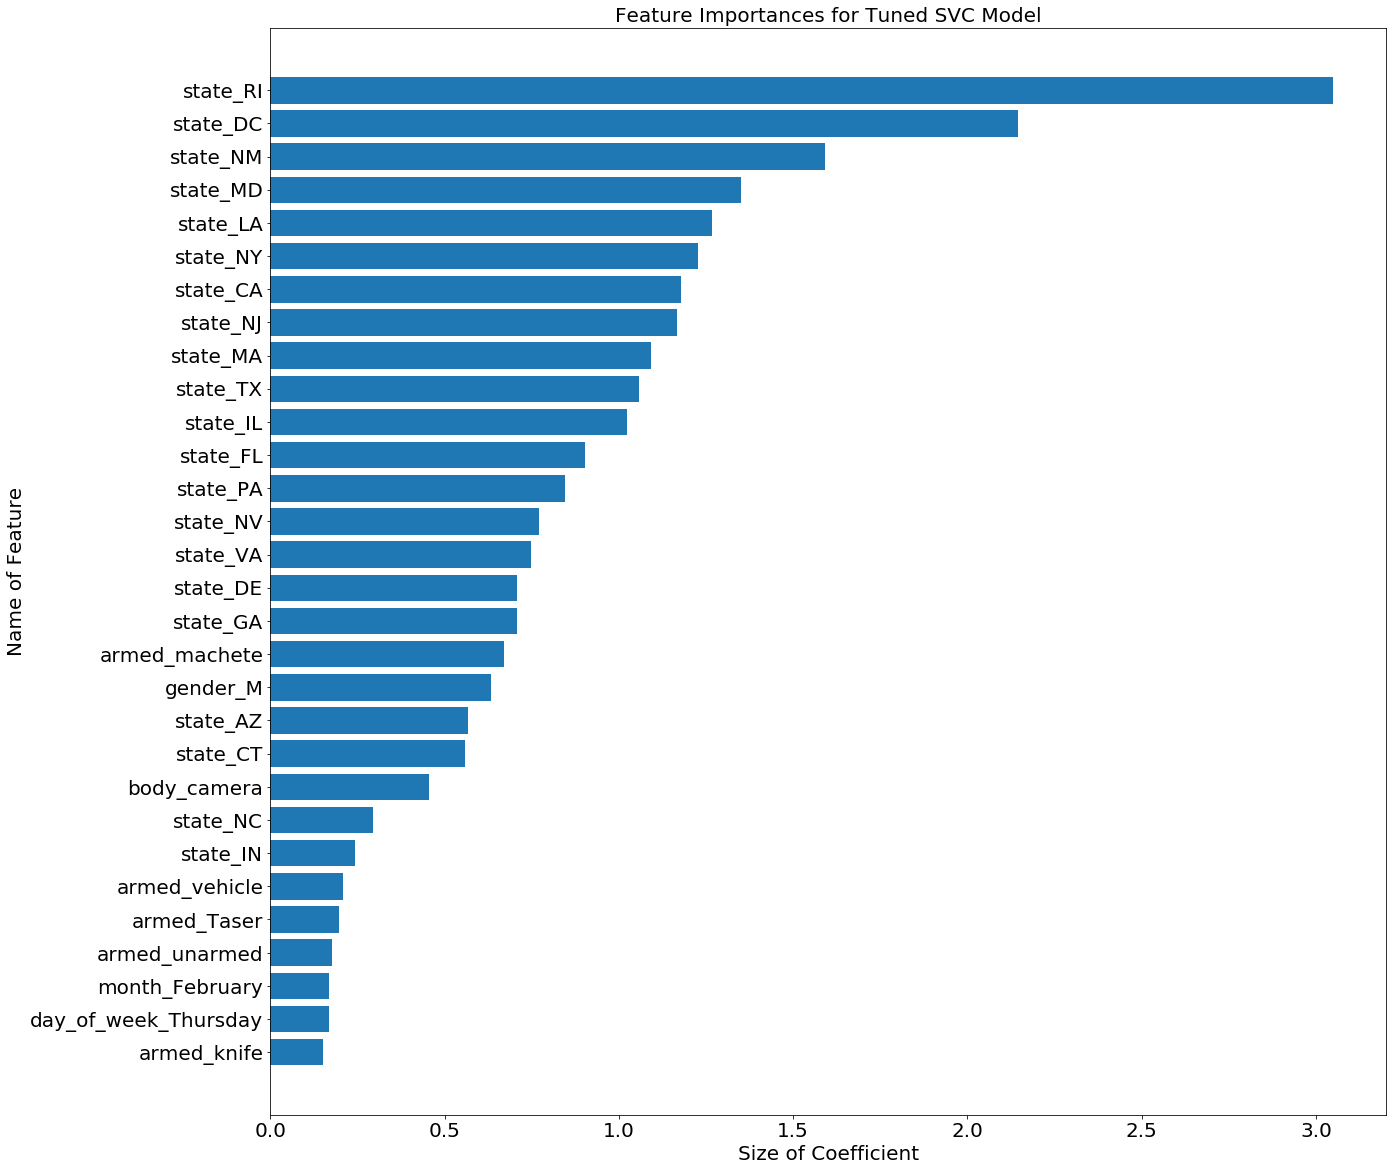

In [187]:
feature_names = X_test.columns[svc.coef_.argsort()[0, -30:]]
importances = np.sort(svc.coef_)[0, -30:]
f_importances(importances, feature_names)

# What do you think? Do I need to do L1 Regularization? 